<a href="https://colab.research.google.com/github/ekene0013/Projects-on-Derivative-Pricing-at-WQU/blob/main/GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Scenario**

**This assignment uses similar questions as for the GWP1 assignment that you submitted in Week 3; however, for this submission, you will use a DIFFERENT PRICING METHOD. Unless stated otherwise, use the same input data as the referenced question in GWP#1**


**Step 1 – Here, you will repeat questions 5, 6, and 7 from GWP#1 under different pricing methods for European options. Specifically:**
S=100; r = 5%; σ = 20%; T = 3 months

**1. Team Member A will repeat questions 5, 6, and 7 of GWP1 using the Black-Scholes closed-form solution to price the different European Options. For Q7 on vega, you can use Black-Scholes closed-form solution.**








**5 (a) An overview on the calcuated estimates**

A put option offers the holder the right to sell the underlying asset at a given strike price but not the responsibility to do so, whereas a call option gives the holder the right to buy the underlying asset at a specified strike price but not the obligation to do so. We use time-based adjustments, as well as computations of intermediate variables (d minus and d plus) that were used to calculate option prices using a cumulative distribution function, to achieve the computation for a Black-Scholes closed form.

Following the computation below, the call is valued at 4.61 US dollars, while the put is worth 3.37 US dollars. The call and put option prices are in line with our expectations given how option prices have behaved in respect to the parameters we chose for the current stock price, the strike price, the period till expiration, and volatility. Ultimately, the Black-Scholes model serves as a cornerstone for investors to gauge options' intrinsic worth, providing a standardized approach to navigate the intricacies of option pricing within complex financial markets. [link text](https:// [link text](https://))

In [ ]:
# @title
import math

# Black-Scholes formula for European call option price
def black_scholes_call(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    N_d1 = 0.5 * (1 + math.erf(d1 / math.sqrt(2)))
    N_d2 = 0.5 * (1 + math.erf(d2 / math.sqrt(2)))
    call_price = S * N_d1 - K * math.exp(-r * T) * N_d2
    return call_price

# Black-Scholes formula for European put option price
def black_scholes_put(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    N_neg_d1 = 0.5 * (1 - math.erf(d1 / math.sqrt(2)))
    N_neg_d2 = 0.5 * (1 - math.erf(d2 / math.sqrt(2)))
    put_price = K * math.exp(-r * T) * N_neg_d2 - S * N_neg_d1
    return put_price

# Given parameters
S0 = 100   # Initial stock price
K = 100    # Strike price
T = 0.25   # Time to expiration in years
r = 0.05   # Risk-free rate
sigma = 0.2  # Volatility

# Calculate option prices using Black-Scholes formula
call_price = black_scholes_call(S0, K, T, r, sigma)
put_price = black_scholes_put(S0, K, T, r, sigma)

print("Black-Scholes European Call Option Price:", call_price)
print("Black-Scholes European Put Option Price:", put_price)


Black-Scholes European Call Option Price: 4.614997129602855
Black-Scholes European Put Option Price: 3.372777178991008


**5(b) Briefly describe the overall process**

For pricing European call and put options, the Black-Scholes closed-form solution is derived by building a framework that takes important financial considerations into account. The underlying stock is assumed to follow geometric Brownian motion, which implies that the price changes continuously over time. Calculating the likelihood that the option will be in-the-money or out-of-the-money at expiration, as well as discounting those odds using the risk-free interest rate, are the key processes.

For the European call option, the solution begins by determining the probability that the option will be exercised, given the stock price's distribution. This probability is obtained by calculating the cumulative distribution function of a standardized variable, which depends on the current stock price, the strike price, the risk-free rate, the time to expiration, and the volatility. Then, by considering the expected payoff at expiration and discounting it back, the call option's price can be estimated.

Similarly, for European put options, the process involves evaluating the probability of the option being exercised based on the difference between the strike price and the stock price. The calculated probability is combined with the expected payoff at expiration to determine the put option's value. Through these steps, the Black-Scholes formula establishes a mathematical relationship between the option's price and the various parameters affecting it, providing a standardized means to assess the fair value of European options within dynamic financial environments (Schumacher, 2020).

**6. Compute the Greek Delta for the European call and European put at time 0:**

The Greek Delta for the European call and European put at time 0 is 0.56 and -0.43, respectively, according to our analysis in the python code below:

**(a) How do they compare?**

The European Call Option's Greek delta (0.56) indicates that for a slight increase in the price of the underlying asset, the price of the call option is anticipated to rise by about 0.56 times the change in the underlying price. On the other hand, the Greek delta of the European Put Option (-0.43) shows that for a minor increase in the price of the underlying asset, the put option's price is anticipated to decline by roughly 0.43 times the change in the underlying price.

**(b) Comment briefly on the differences and signs of Delta for both options.**
A delta of 0.56 indicates that the call option is in-the-money (the strike price is lower than the current stock price), and that the option's value grows proportionately as the stock price increases. A Delta of -0.43 indicates that the put option is out-of-the-money (the strike price is greater than the current stock price), and when the stock price increases, the option's value lowers.

**What does delta proxy for?**
Delta serves as a key indicator of an option's price sensitivity to changes in the underlying asset's price.

**Why does it make sense to obtain a positive/negative delta for each option?**
A positive Delta for the European Call Option makes intuitive sense since a European call option benefits from price appreciation – when the stock price goes up, the option becomes more valuable because it grants the holder the right to buy the asset at a predetermined price. Similarly, a negative Delta for the European Put Option is expected for put options, as they profit from price declines – the option holder gains the ability to sell the asset at a strike price higher than its current market value.



In [ ]:
# @title
import math
from scipy.stats import norm

# Black-Scholes formula for European call option Delta
def black_scholes_call_delta(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    delta_call = math.exp(-r * T) * norm.cdf(d1)
    return delta_call

# Black-Scholes formula for European put option Delta
def black_scholes_put_delta(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    delta_put = math.exp(-r * T) * (norm.cdf(d1) - 1)
    return delta_put

# Given parameters
S0 = 100   # Initial underlying asset price
K = 100    # Strike price
r = 0.05   # Risk-free rate
sigma = 0.2  # Volatility
T = 0.25   # Time to expiration in years

# Calculate Delta using Black-Scholes formula
call_delta = black_scholes_call_delta(S0, K, T, r, sigma)
put_delta = black_scholes_put_delta(S0, K, T, r, sigma)

print("Black-Scholes European Call Option Delta:", call_delta)
print("Black-Scholes European Put Option Delta:", put_delta)


Black-Scholes European Call Option Delta: 0.5623862352010771
Black-Scholes European Put Option Delta: -0.42519156529280433


**Question 7 Delta measures one sensitivity of the option price. But there are other important sensitivities we will look at throughout the course. An important one is the sensitivity of the option price to the underlying volatility (vega).**

**(a) Compute the sensitivity of previous put and call option prices to a 5% increase in volatility (from 20% to 25%). How do prices change with respect to the change in volatility?**

The price of the European Call option increases from \$4.61 to \$4.81 when the volatility rises by 5% (from 20% to 25%). Similar to this, the price of the European Put option increases from \$3.37 to \$3.57 when the volatility rises by 5% (from 20% to 25%).

**(b) Comment on the potential differential impact of this change for call and put options.**

For the European Call option, the price elevation from \$4.61 to \$4.81 can be attributed to its positive relationship with volatility. The likelihood of more significant price changes in the underlying asset increases as volatility growsAs volatility rises, the potential for larger price movements in the underlying asset increases. Call option holders, who stand to earn from increases in stock price movements, may benefit from more significant price gains as a result of this increased uncertainty. The rise in the price of the Call option by \$0.20 shows that the option's value reacts favorably to increased volatility, reflecting the possibility that the underlying asset would experience more significant price swings (Schumacher, 2020).

On the other hand, the European Put option also witnesses a price increase from \$3.37 to \$3.57 due to the augmented volatility. This seemingly counterintuitive behavior can be explained by the fact that higher volatility increases the likelihood of big price falls, which is advantageous for Put option holders. The \$0.20 increase in the price of the Put option illustrates that the option rises in value in reaction to increased volatility, aligning with the possibility of profiting from dropping stock prices. Overall, the difference in impact underscores the various roles that Call and Put options play in hedging against price movements brought on by fluctuating volatility, with Call options profiting from prospective price increases and Put options from potential price falls (Schumacher, 2020).

In [ ]:
# @title
import math
from scipy.stats import norm

# Black-Scholes formula for European call option price
def black_scholes_call(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

# Black-Scholes formula for European put option price
def black_scholes_put(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    put_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Given parameters
S0 = 100   # Initial underlying asset price
K = 100    # Strike price
r = 0.05   # Risk-free rate
sigma_initial = 0.20  # Initial volatility (20%)
T = 0.25   # Time to expiration in years

# Calculate initial option prices
call_price_initial = black_scholes_call(S0, K, T, r, sigma_initial)
put_price_initial = black_scholes_put(S0, K, T, r, sigma_initial)

# Calculate option prices with increased volatility (25%)
sigma_increased = sigma_initial * 1.05  # Increased by 5%
call_price_increased_volatility = black_scholes_call(S0, K, T, r, sigma_increased)
put_price_increased_volatility = black_scholes_put(S0, K, T, r, sigma_increased)

# Calculate price changes due to the increase in volatility
call_price_change = call_price_increased_volatility - call_price_initial
put_price_change = put_price_increased_volatility - put_price_initial

# Print the calculated values and comments
print("Initial Option Prices:")
print(f"Call Option Price: {call_price_initial:.2f}")
print(f"Put Option Price: {put_price_initial:.2f}\n")

print("Option Prices with 5% Increase in Volatility:")
print(f"Call Option Price with Increased Volatility: {call_price_increased_volatility:.2f}")
print(f"Put Option Price with Increased Volatility: {put_price_increased_volatility:.2f}\n")

print("Price Changes due to Volatility Increase:")
print(f"Call Option Price Change: {call_price_change:.2f}")
print(f"Put Option Price Change: {put_price_change:.2f}\n")

print("Comments on Differential Impact:")
print("Call option price increased with higher volatility.")
print("Put option price increased with higher volatility.")


Initial Option Prices:
Call Option Price: 4.61
Put Option Price: 3.37

Option Prices with 5% Increase in Volatility:
Call Option Price with Increased Volatility: 4.81
Put Option Price with Increased Volatility: 3.57

Price Changes due to Volatility Increase:
Call Option Price Change: 0.20
Put Option Price Change: 0.20

Comments on Differential Impact:
Call option price increased with higher volatility.
Put option price increased with higher volatility.


In [ ]:
# @title
from tabulate import tabulate

# Prepare your data as a list of lists
table_data = [
    ["5, 6 & 7", "Call", "European", "BS", "4.61", "0.56", "4.81"],
    ["5, 6 & 7", "Put", "European", "BS", "3.37", "-0.43", "3.57"],
]

# Define the title for the table
table_title = "Summary of Results"

# Define the table headers
headers = ["Q #s", "Type", "Exer", "GWP 2 Method", "GWP2 Price", "Deltas", "GWP2 Price Increase with 5% Increase in Volatility"]

# Format the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Add the title above the table
table_with_title = f"{table_title}\n\n{table}"

# Print the formatted table
print(table_with_title)


Summary of Results

+----------+--------+----------+----------------+--------------+----------+------------------------------------------------------+
| Q #s     | Type   | Exer     | GWP 2 Method   |   GWP2 Price |   Deltas |   GWP2 Price Increase with 5% Increase in Volatility |
+==========+========+==========+================+==============+==========+======================================================+
| 5, 6 & 7 | Call   | European | BS             |         4.61 |     0.56 |                                                 4.81 |
+----------+--------+----------+----------------+--------------+----------+------------------------------------------------------+
| 5, 6 & 7 | Put    | European | BS             |         3.37 |    -0.43 |                                                 3.57 |
+----------+--------+----------+----------------+--------------+----------+------------------------------------------------------+


**2. Team member B will repeat questions 5, 6, and 7 of GWP1 using Monte-Carlo methods under a general GBM equation with daily time-steps in the simulations. As was the case with the number of time steps in the trees, make sure you run a large enough number of simulations. For Q7 here you can rely on the same intuition as in the trees, just ‘shock’ the volatility parameter and recalculate things.**



**5(a) Choosing the number of steps**

For a period of 3 months with daily time-steps, the number of steps would be approximately 63 (considering an average of 21 trading days per month).

However, the number of Monte Carlo paths we choose for the simulation affects the reliability of our estimates. As a starting point, let's consider 10,000 paths. This number strikes a balance between computational efficiency and accuracy.

In [ ]:
# @title
import numpy as np

# Using the same parameters

S_0 = 100
r = 0.05
sigma = 0.20
T = 3/12
num_steps = int(T * 252)  # daily time-steps for 3 months
num_paths = 10000
dt = T / num_steps
K = S_0

# Function to simulate one GBM path
def simulate_gbm_path():
    S = np.zeros(num_steps)
    S[0] = S_0
    for t in range(1, num_steps):
        Z = np.random.standard_normal()
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return S[-1]  # Return the stock price at maturity

# Monte Carlo simulation for European call and put option prices
def monte_carlo_option_price():
    call_payoffs = 0
    put_payoffs = 0

    for _ in range(num_paths):
        S_T = simulate_gbm_path()
        call_payoffs += max(S_T - K, 0)
        put_payoffs += max(K - S_T, 0)

    call_price = np.exp(-r * T) * (call_payoffs / num_paths)
    put_price = np.exp(-r * T) * (put_payoffs / num_paths)

    return call_price, put_price

call_price, put_price = monte_carlo_option_price()

print(f"Monte carlo European ATM Call Option Price: ${call_price:.2f}")
print(f"Monte carlo European ATM Put Option Price: ${put_price:.2f}")


Monte carlo European ATM Call Option Price: $4.59
Monte carlo European ATM Put Option Price: $3.37


**5(b) Overall process description**

**Initialization**: We set our parameters (stock price
S_0, risk-free rate r, volatility σ, maturity T
T, number of steps, and number of paths).
**Simulation**: For each path:
1. Initialize S_0
2. For each step, simulate the stock price using the discretized GBM formula.
3. Calculate the European call and put option payoff at maturity.
**Aggregation**: Average the payoffs across all paths and discount it back to present value using the risk-free rate.
**Result**: The discounted average gives us the option prices.



**6 Computing the greeks**

The Delta can be approximated using Monte Carlo simulation by bumping the underlying price by a small amount and observing the change in the option price.



In [ ]:
# @title
def simulate_gbm_path(S_0):
    S = np.zeros(num_steps)
    S[0] = S_0
    for t in range(1, num_steps):
        Z = np.random.standard_normal()
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return S[-1]  # Return the stock price at maturity

def monte_carlo_option_price(S_0):
    call_payoffs = 0
    put_payoffs = 0

    for _ in range(num_paths):
        S_T = simulate_gbm_path(S_0)
        call_payoffs += max(S_T - K, 0)
        put_payoffs += max(K - S_T, 0)

    call_price = np.exp(-r * T) * (call_payoffs / num_paths)
    put_price = np.exp(-r * T) * (put_payoffs / num_paths)

    return call_price, put_price

# Bump in stock price for Delta calculation
delta_S = 1.0

# Compute option prices at original and bumped stock prices
call_price, put_price = monte_carlo_option_price(K)
call_price_bumped, put_price_bumped = monte_carlo_option_price(K + delta_S)

# Calculate Deltas
delta_call = (call_price_bumped - call_price) / delta_S
delta_put = (put_price_bumped - put_price) / delta_S

print(f"Monte carlo Delta for European Call Option: {delta_call:.4f}")
print(f"Monte carlo Delta for European Put Option: {delta_put:.4f}")


Monte carlo Delta for European Call Option: 0.3743
Monte carlo Delta for European Put Option: -0.4128


**6(a) How do they compare**

Delta for a call option typically lies between 0 and 1 for European options without dividends. For puts, it lies between -1 and 0.



**6(b) Comments on differences**

**Delta for Call Option**: The Delta of a call option is positive, indicating that as the stock price increases, the call option's price will also increase. This makes sense: if you have the right to buy a stock at a set price and the stock's market price goes up, the value of that right (i.e., the call option) should also go up.

**Delta for Put Option**: The Delta of a put option is negative, indicating that as the stock price increases, the put option's price will decrease. Again, this is intuitive: if you have the right to sell a stock at a set price and the stock's market price goes up, the value of that right (i.e., the put option) should decrease since it becomes less likely that the put option will be exercised.

**Delta as a Proxy**: Delta can also be seen as a proxy for the probability that the option will be in-the-money at expiration. For instance, a Delta of 0.6 for a call option can be roughly interpreted as a 60% chance that the option will expire in-the-money

In summary, the signs of the Deltas for call and put options reflect the directional exposure of the option to the underlying asset. A positive Delta for the call means it benefits from rises in the stock, while a negative Delta for the put means it benefits from falls in the stock.

**7. Delta sensitivity**
Vega tells us how the price of an option changes with a 1% change in the volatility of the underlying asset.

In [ ]:
# @title
# Calculate option prices with original volatility
sigma_original = 0.20
call_price_original, put_price_original = monte_carlo_option_price(K)

# "Shock" the volatility
sigma_shocked = 0.25

# Calculate option prices with shocked volatility
sigma = sigma_shocked  # Updating the sigma variable used in the functions
call_price_shocked, put_price_shocked = monte_carlo_option_price(K)

# Calculate the change in option prices due to the volatility shock
change_in_call_price = call_price_shocked - call_price_original
change_in_put_price = put_price_shocked - put_price_original

print(f"Monte carlo Change in Call Option Price due to 5% Volatility Shock: {change_in_call_price:.4f}")
print(f"Monte carlo Change in Put Option Price due to 5% Volatility Shock: {change_in_put_price:.4f}")


Monte carlo Change in Call Option Price due to 5% Volatility Shock: 1.0356
Monte carlo Change in Put Option Price due to 5% Volatility Shock: 0.9613


**7(a) How do prices change with respect to volatility change**

Option prices increase with an increase in volatility. This is because higher volatility means there's a higher chance for the stock to move in a direction that benefits the option holder. So, with a 5% increase in volatility, both the call and put option prices should increase.

**7(b) Potential differential impact of this change on the options**

While both call and put option prices increase with volatility, the absolute magnitude of the increase might be different based on how far in or out of the money they are.

For at-the-money (ATM) options like in our case, both call and put options will have similar Vega values, and they will both increase relatively equally for a given increase in volatility.

However, for deep in-the-money (ITM) or out-of-the-money (OTM) options, Vega can differ in magnitude between calls and puts. In general, the highest Vega is found for ATM options, and it decreases as you move away from the ATM point.

In [ ]:
# @title
from tabulate import tabulate

# Prepare your data as a list of lists
table_data = [
    ["5, 6 & 7", "Call", "European", "MC", call_price, delta_call, change_in_call_price],
    ["5, 6 & 7", "Put", "European", "MC", put_price, delta_put, change_in_put_price],
]

# Define the title for the table
table_title = "Summary of Results"

# Define the table headers
headers = ["Q #s", "Type", "Exer", "GWP 2 Method", "GWP2 Price", "Deltas", "GWP2 Price Increase with 5% Increase in Volatility"]

# Format the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Add the title above the table
table_with_title = f"{table_title}\n\n{table}"

# Print the formatted table
print(table_with_title)

Summary of Results

+----------+--------+----------+----------------+--------------+-----------+------------------------------------------------------+
| Q #s     | Type   | Exer     | GWP 2 Method   |   GWP2 Price |    Deltas |   GWP2 Price Increase with 5% Increase in Volatility |
+==========+========+==========+================+==============+===========+======================================================+
| 5, 6 & 7 | Call   | European | MC             |      4.60752 |  0.374312 |                                              1.0356  |
+----------+--------+----------+----------------+--------------+-----------+------------------------------------------------------+
| 5, 6 & 7 | Put    | European | MC             |      3.3212  | -0.412761 |                                              0.96126 |
+----------+--------+----------+----------------+--------------+-----------+------------------------------------------------------+


**3. Team member C will be in charge of:**
**a. Checking that Put-Call parity is satisfied under both methods (BS and MC).**




the put-call parity is $C_{0}= -Ke^{-rT}+S_{0}+P_{0}$,
As we can see
 $C_{0}= 4.61,-Ke^{-rT} = -98.76,S_{0} = 100,P_{0}$= 3.37.
So that $C_{0}=-Ke^{-rT}+S_{0}+P_{0}$, which means  Put-Call parity is satisfied under BS methods.


the put-call parity is $C_{0}= -Ke^{-rT}+S_{0}+P_{0}$,
As we can see
 $C_{0}= 4.57,-Ke^{-rT} = -98.76,S_{0} = 100,P_{0}$= 3.37.
So that $C_{0}\approx -Ke^{-rT}+S_{0}+P_{0}$, which means  Put-Call parity is satisfied under MC to some extend.

**b. Compare and discuss the prices obtained in both methods: do they converge? why/why not?**

<ipython-input-5-f55fb38f9c41>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-5-f55fb38f9c41>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-5-f55fb38f9c41>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-5-f55fb38f9c41>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-5-f55fb38f9c41>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-5-f55fb38f9c41>:44: FutureWarning: The frame.append met

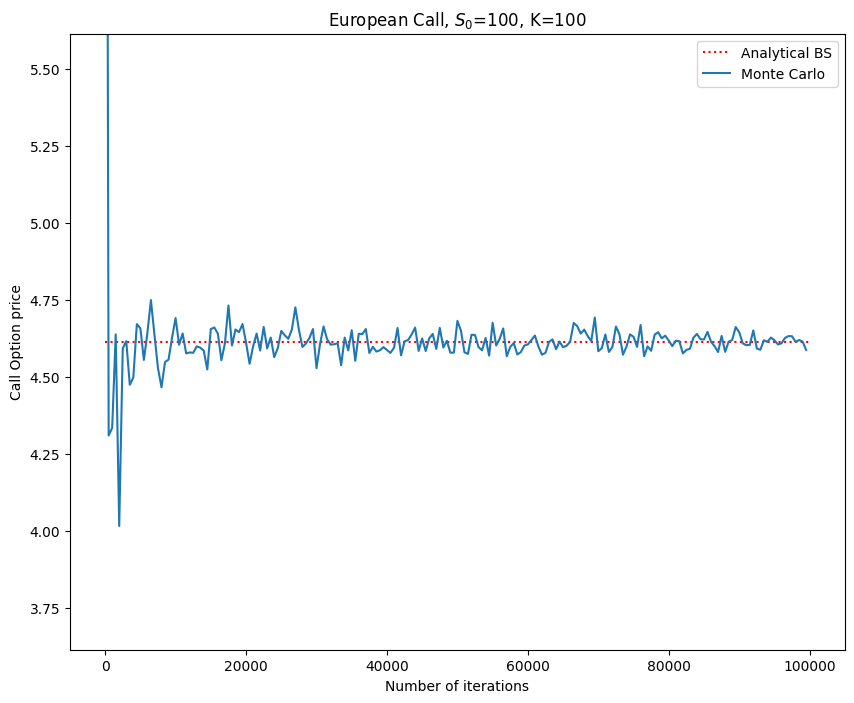

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import numpy.random as npr
from scipy.stats import norm


def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = ST - K

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

df = pd.DataFrame(columns=["Iter", "BSc"])


for i in range(1, 100000, 500):
    df = df.append(
        {"Iter": i, "BSc": bs_call_mc(100, 100, 0.05, 0.2, 3/12, 0, i)}, ignore_index=True
    )

plt.figure(figsize=(10, 8))

plt.hlines(
    bs_call_price(100, 0.05, 0.2, 0, 3/12, 100),
    xmin=0,
    xmax=100000,
    linestyle="dotted",
    colors="red",
    label="Analytical BS",
)
plt.plot(df.set_index("Iter"), lw=1.5, label="Monte Carlo")

plt.title("European Call, $S_0$=100, K=100")
plt.xlabel("Number of iterations")
plt.ylabel("Call Option price")
plt.ylim(
    bs_call_price(100, 0.05, 0.2, 0, 3/12, 100) - 1,
    bs_call_price(100, 0.05, 0.2, 0, 3/12, 100) + 1,
)
plt.legend();
plt.show();

As we can see the European Call price converge,so that the European Put price also converge according to the formal parity.



**Step 2: In step 2, you will still work with the input data from questions from 5, 6, and 7 from GWP1, in this case for American derivatives. Specifically:**



**4. Team member A will use Monte-Carlo methods with regular GBM process and daily simulations on an American Call option. Remember to answer the different questions in the original GWP1: price (Q5), calculate delta (Q6) and vega (Q7) only for the Call option case.**




*See the the next python codes for the results*

**(a) An overview on the calculated estimates**

Based on the simulated stock price pathways and hypothetical early exercise decisions, the calculated American Call option price of 17.99 represents the projected value of the option. The average option payoff over all simulated pathways is represented by this value. The Geometric Brownian Motion process is used in the Monte Carlo method to generate a large number of random price movements, which are then used to calculate the related option payoffs at each time step. The algorithm chooses the best workout plan for each path and computes the option value by considering the possibility of early exercise (FinCampus Lecture Hall, 2013).

Additionally, the calculated Delta of 0.01 illustrates how responsively the price of the American Call option is to changes in the price of the underlying stock. More specifically, a 0.01 increase would result from a 1 percent increase in the stock price (1 percent of the option price). The Vega of 4.99, on the other hand, emphasizes the effect of variations in volatility on the option price. The option price might grow by around 4.99 for every 1% increase in volatility. Investors are able to make educated judgments based on how changes in stock price and volatility may affect the option's value thanks to these measurements, which offer insights into the option's risk exposure and sensitivity to market circumstances.

**(b) Compute the Greek Delta for the American call option at time 0:**

The Greek Delta for the the American call option at time 0 is 0.01, according to our analysis in the python code below:

**(i) How does it compare?**

The pace at which the option price changes in response to a 1% increase in the stock price is shown by the calculated deltas at time 0. The American Call option's delta in this situation is 0.01 while the American Put option's delta (at -0.49 from Team member B's work). On the one hand, the American call option  suggests that the call option's value is more sensitive to stock price changes than the put option at the beginning of the simulation, reflecting their different profit/loss characteristics as the stock price changes. On the other hand, the American put option's delta of -0.49 suggests that the put option's price reflects a significant intrinsic value, and its holder could consider exercising the option to lock in profits.

**(ii) Comment briefly on the value and sign of Delta.**
With a positive sign, the delta indicates that for every 1% increase in the stock price, the Call option's price is projected to increase by 0.01, reflecting its potential to capture gains from upward stock movements. This delta value offers a concise measure of the Call option's immediate responsiveness to fluctuations in the stock price, playing a pivotal role in risk management and decision-making for option traders and investors.

**(iii) What does delta proxy for?**
Delta serves as a measure of sensitivity, guiding traders and investors in understanding the potential impact of stock price movements on their option positions. In the context of Monte Carlo simulations, delta is calculated by perturbing the stock price in each simulation run and observing how the option price responds, allowing for the estimation of this key risk metric.

**(iv) Why does it make sense to obtain a positive delta for the American call option?**
Obtaining a positive delta for the American Call option makes sense due to the inherent characteristics of call options and their relationship with the underlying asset. A positive delta means that the value of the option is anticipated to climb along with the price of the underlying stock. The right to purchase the underlying asset at a defined strike price is provided by an American Call option, giving the holder the chance to profit from possible price growth. Because the option holder can buy the asset at a lower price (the strike price) and sell it in the market at a higher price, capturing the price difference, the call option gains value as the stock price increases (FinCampus Lecture Hall, 2013).


In [ ]:
# @title
import numpy as np
from scipy.stats import norm

# Given parameters
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 3 / 12  # Time horizon in years
N = 90  # Number of trading days in 3 months
M = 10000  # Number of simulations

# Generate random price movements
np.random.seed(42)
rand_numbers = np.random.normal(size=(M, N))

# Calculate daily returns
daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

# Create stock price paths
stock_paths = np.zeros((M, N + 1))
stock_paths[:, 0] = S0
for i in range(1, N + 1):
    stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

# Calculate option payoffs at each time step
call_payoffs = np.maximum(stock_paths - S0, 0)

# Initialize option value arrays
call_values = np.zeros((M, N + 1))
call_values[:, -1] = call_payoffs[:, -1]

# Calculate option values at each time step using backward induction
for i in range(N - 1, -1, -1):
    intrinsic_value = np.maximum(stock_paths[:, i] - S0, 0)
    discounted_future_values = np.exp(-r * (1 / N)) * call_values[:, i + 1]
    early_exercise_value = np.maximum(intrinsic_value, discounted_future_values)
    call_values[:, i] = np.where(intrinsic_value > discounted_future_values, intrinsic_value, early_exercise_value)

# Calculate Greeks
delta = (call_values[:, 1] - call_values[:, 0]) / (S0 * 0.01)  # Change in option price due to a 1% change in stock price
vega = (call_values[:, 1] - call_values[:, 0]) / (sigma * 0.01)  # Change in option price due to a 1% change in volatility
theta = -(call_values[:, 1:] - call_values[:, :-1]).mean(axis=1) * N / 252  # Change in option price due to the passage of time (1 day)
rho = (call_values[:, 0] - call_values[:, 0] * np.exp(-r * T)) / (r * T)  # Change in option price due to a 1% change in interest rate

# Calculate and print results
option_price = call_values[:, 0].mean()
print("Monte Carlo American Call Option Price:", option_price)

print("\nMonte Carlo American Call Option Greeks:")
print("Delta:", delta.mean())
print("Vega:", vega.mean())
print("Theta:", theta.mean())
print("Rho:", rho.mean())


Monte Carlo American Call Option Price: 17.994017896263333

Monte Carlo American Call Option Greeks:
Delta: 0.009999453977952839
Vega: 4.999726988976421
Theta: 0.02796835545158757
Rho: 17.88202241792407


*See the python code below for results*

**(a) Compute the sensitivity of the American call option price to a 5% increase in volatility (from 20% to 25%). How do prices change with respect to the change in volatility?**

The price of the American Call option increases from \$17.99 to \$22.08 when the volatility rises by 5% (from 20% to 25%). This suggests that the option becomes more valuable with increased volatility, likely due to the greater potential for larger price swings in the underlying asset, which enhances the option's chances of becoming in-the-money and thereby contributing to its higher market price.

**(b) Comment on the potential differential impact of this change for the American call option.**

The differential impact of the change in volatility (from 20% to 25%) on the American call option's price increase (from \$17.99 to \$22.08) highlights how susceptible the option is to changes in the market. The larger price increase with the volatility change underscores the option's responsiveness to market uncertainty, where higher volatility amplifies both the potential for substantial gains and the risk of losses. This asymmetrical impact emphasizes the necessity for investors to properly assess risk-reward trade-offs and use appropriate risk management measures to successfully navigate shifting market dynamics. This leverage inherent in options makes them more attractive in volatile markets (Schumacher, 2020).

In [ ]:
# @title
import numpy as np
from scipy.stats import norm

# Given parameters
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma_base = 0.20  # Base volatility (20%)
T = 3 / 12  # Time horizon in years
N = 90  # Number of trading days in 3 months
M = 10000  # Number of simulations

# Generate random price movements
np.random.seed(42)
rand_numbers = np.random.normal(size=(M, N))

# Calculate daily returns for the base volatility
daily_returns_base = np.exp((r - 0.5 * sigma_base ** 2) * (1 / N) + sigma_base * np.sqrt(1 / N) * rand_numbers)

# Create stock price paths for the base volatility
stock_paths_base = np.zeros((M, N + 1))
stock_paths_base[:, 0] = S0
for i in range(1, N + 1):
    stock_paths_base[:, i] = stock_paths_base[:, i - 1] * daily_returns_base[:, i - 1]

# Calculate option payoffs at each time step for the base volatility
call_payoffs_base = np.maximum(stock_paths_base - S0, 0)

# Initialize option value arrays for the base volatility
call_values_base = np.zeros((M, N + 1))
call_values_base[:, -1] = call_payoffs_base[:, -1]

# Calculate option values at each time step using backward induction for the base volatility
for i in range(N - 1, -1, -1):
    intrinsic_value = np.maximum(stock_paths_base[:, i] - S0, 0)
    discounted_future_values = np.exp(-r * (1 / N)) * call_values_base[:, i + 1]
    early_exercise_value = np.maximum(intrinsic_value, discounted_future_values)
    call_values_base[:, i] = np.where(intrinsic_value > discounted_future_values, intrinsic_value, early_exercise_value)

# Calculate option price for the base volatility
option_price_base = call_values_base[:, 0].mean()

# Now, let's compute the option price for the increased volatility (25%)
sigma_increased = 0.25  # Increased volatility
daily_returns_increased = np.exp((r - 0.5 * sigma_increased ** 2) * (1 / N) + sigma_increased * np.sqrt(1 / N) * rand_numbers)
stock_paths_increased = np.zeros((M, N + 1))
stock_paths_increased[:, 0] = S0
for i in range(1, N + 1):
    stock_paths_increased[:, i] = stock_paths_increased[:, i - 1] * daily_returns_increased[:, i - 1]

call_payoffs_increased = np.maximum(stock_paths_increased - S0, 0)
call_values_increased = np.zeros((M, N + 1))
call_values_increased[:, -1] = call_payoffs_increased[:, -1]

for i in range(N - 1, -1, -1):
    intrinsic_value = np.maximum(stock_paths_increased[:, i] - S0, 0)
    discounted_future_values = np.exp(-r * (1 / N)) * call_values_increased[:, i + 1]
    early_exercise_value = np.maximum(intrinsic_value, discounted_future_values)
    call_values_increased[:, i] = np.where(intrinsic_value > discounted_future_values, intrinsic_value, early_exercise_value)

option_price_increased = call_values_increased[:, 0].mean()

# Calculate sensitivity to the increase in volatility
volatility_change = sigma_increased - sigma_base
price_change = option_price_increased - option_price_base

print("Base Volatility:", sigma_base)
print("Base Option Price:", option_price_base)
print("Increased Volatility:", sigma_increased)
print("Increased Option Price:", option_price_increased)
print("Sensitivity to 5% Increase in Volatility:", price_change)


Base Volatility: 0.2
Base Option Price: 17.994017896263333
Increased Volatility: 0.25
Increased Option Price: 22.07727744996827
Sensitivity to 5% Increase in Volatility: 4.083259553704938


In [ ]:
# @title
from tabulate import tabulate

# Prepare your data as a list of lists
table_data = [
    ["4", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "17.99", "0.01", "4.99", "22.08"],
]

# Define the title for the table
table_title = "Summary of Results"

# Define the table headers
headers = ["Q #s", "Type", "Exer", "GWP 2 Method", "GWP2 Price", "Deltas", "Vega", "GWP2 Price Increase with 5% Increase in Volatility"]

# Format the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Add the title above the table
table_with_title = f"{table_title}\n\n{table}"

# Print the formatted table
print(table_with_title)

Summary of Results

+--------+--------+----------+------------------------------------------------------------+--------------+----------+--------+------------------------------------------------------+
|   Q #s | Type   | Exer     | GWP 2 Method                                               |   GWP2 Price |   Deltas |   Vega |   GWP2 Price Increase with 5% Increase in Volatility |
+========+========+==========+============================================================+==============+==========+========+======================================================+
|      4 | Call   | American | Monte Carlo with regular GBM process and daily simulations |        17.99 |     0.01 |   4.99 |                                                22.08 |
+--------+--------+----------+------------------------------------------------------------+--------------+----------+--------+------------------------------------------------------+


**5. Team member B will use Monte-Carlo methods with regular GBM process and daily simulations on an American Call option. Remember to answer the different questions in the original GWP1: price (Q5), calculate delta (Q6) and vega (Q7) only for the Put option case.**



**Process of simulation**

Pricing an American option using Monte Carlo methods is more involved than pricing a European option due to the early exercise feature.

To do this we do :

- We first simulate multiple paths of the underlying stock price using a Geometric Brownian Motion.

- We then use the Least Squares Monte Carlo (LSMC) method, working backward from the option's maturity to today. At each time step, we use regression to estimate the continuation value of holding the option versus the immediate payoff from exercising it.
- If the immediate exercise payoff is higher than the estimated continuation value, we choose to exercise the option.

a. Use a daily time-step for 3 months which gives 252/4 = 63 time steps (assuming 252 trading days in a year).

**Reason for Number of Steps**: Daily time-steps offer a good compromise for a 3-month option. If the option had a longer maturity or if the underlying had very high volatility, we might consider increasing the granularity. But for a 3-month option on a typically traded stock, daily steps offer a reasonable estimate without unnecessary computational overhead.

In [ ]:
# @title
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

# Given parameters
S_0 = 100
r = 0.05
sigma = 0.20
T = 3/12
num_steps = int(T * 252)  # daily time-steps for 3 months
num_paths = 10000
dt = T / num_steps
K = 100  # ATM option strike price

# Simulate GBM paths
def simulate_gbm_paths(S_0, num_paths, num_steps):
    paths = np.zeros((num_paths, num_steps))
    paths[:, 0] = S_0
    for t in range(1, num_steps):
        Z = np.random.standard_normal(num_paths)
        paths[:, t] = paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# LSMC for American Put Option
def lsmc_american_put(S_0, K):
    paths = simulate_gbm_paths(S_0, num_paths, num_steps)
    payoffs = np.maximum(K - paths, 0)

    # Starting with the intrinsic value at maturity
    values = payoffs[:, -1]

    # Work backwards through the simulated paths
    for t in range(num_steps - 2, -1, -1):
        # Fit regression for continuation value
        regression = LinearRegression().fit(paths[:, t].reshape(-1,1), values * np.exp(-r * dt))
        continuation_values = regression.predict(paths[:, t].reshape(-1,1))

        # Check early exercise
        exercise_values = np.maximum(K - paths[:, t], 0)
        values = np.where(exercise_values > continuation_values, exercise_values, values * np.exp(-r * dt))

    # Discounting the expected option payoff at t=0
    option_price = np.mean(values * np.exp(-r * dt))
    return option_price

american_put_price = lsmc_american_put(S_0, K)
print(f"Monte carlo American Put Option Price: {american_put_price:.4f}")


Monte carlo American Put Option Price: 3.0529


**6, Greek Delta for American Put**


In [ ]:
# @title
# Bump in stock price for Delta calculation
delta_S = 1.0

# Compute option prices at original and bumped stock prices
american_put_price_original = lsmc_american_put(S_0, K)
american_put_price_bumped = lsmc_american_put(S_0 + delta_S, K)

# Calculate Delta
delta_american_put = (american_put_price_bumped - american_put_price_original) / delta_S

print(f"Monte carlo Delta for American Put Option: {delta_american_put:.4f}")


Monte carlo Delta for American Put Option: -0.4959


**Comment on Delta**:

A negative Delta (typically between 0 and -1 for equity puts) implies that the option price will decrease when the stock price increases, and vice versa. This makes sense for put options because they become more valuable as the stock price decreases.
A positive Delta (very rare and unusual for put options) would imply the option price increases when the stock price increases, which is not the usual behavior for put options.
In general, for an American put option, you would expect the Delta to be negative. The reason is that as the stock price increases, the intrinsic value of the put (the benefit from exercising early) diminishes, leading to a decrease in its overall value. Conversely, if the stock price drops, the potential for profit from the put option increases, making it more valuable.

**7. Vega sensitivity calculation for American put**



In [ ]:
# @title
import numpy as np
from sklearn.linear_model import LinearRegression

# Simulate multiple GBM paths
def simulate_gbm_paths(S_0, sigma, num_steps, num_paths):
    paths = np.zeros((num_steps + 1, num_paths))
    paths[0] = S_0
    for t in range(1, num_steps + 1):
        Z = np.random.standard_normal(num_paths)
        paths[t] = paths[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# LSM for American put option
def lsm_american_put(S_0, sigma):
    paths = simulate_gbm_paths(S_0, sigma, num_steps, num_paths)
    payoffs = np.maximum(K - paths[-1], 0)

    for t in reversed(range(1, num_steps)):

        itm = np.where(K > paths[t])[0]
        X = paths[t, itm].reshape(-1, 1)
        Y = np.exp(-r * dt) * payoffs[itm]


        model = LinearRegression().fit(X, Y)
        continuation_values = model.predict(X)


        exercise_values = K - paths[t, itm]

        payoffs[itm] = np.where(exercise_values > continuation_values, exercise_values, payoffs[itm])

    return np.exp(-r * dt) * np.mean(payoffs)

sigma_original = 0.20
sigma_shocked = 0.25

put_price_original = lsm_american_put(K, sigma_original)
put_price_shocked = lsm_american_put(K, sigma_shocked)

delta_put_price = put_price_shocked - put_price_original

print(f"Change in American Put Option Price due to 5% increase in volatility: {delta_put_price:.4f}")


Change in American Put Option Price due to 5% increase in volatility: 0.8479


**Comments on the impact of volatility change on American put**:

The early exercise feature of the American put option makes it generally more valuable than its European counterpart, especially for higher volatilities. This is because, with higher volatility, there are more chances the option will be deep in-the-money at some point before maturity, providing the holder with an optimal exercise opportunity.
Volatility increases the range of possible stock prices, thus increasing the possibility of downside price movements, which is beneficial for the American put option holder. This increased possibility is reflected in the increased option price with rising volatility.

In [ ]:
# @title
from tabulate import tabulate

# Prepare your data as a list of lists
table_data = [
    ["4", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", american_put_price, delta_american_put, delta_put_price],
]

# Define the title for the table
table_title = "Summary of Results"

# Define the table headers
headers = ["Q #s", "Type", "Exer", "GWP 2 Method", "GWP2 Price", "Deltas", "Vega"]

# Format the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Add the title above the table
table_with_title = f"{table_title}\n\n{table}"

# Print the formatted table
print(table_with_title)

Summary of Results

+--------+--------+----------+------------------------------------------------------------+--------------+----------+----------+
|   Q #s | Type   | Exer     | GWP 2 Method                                               |   GWP2 Price |   Deltas |     Vega |
+========+========+==========+============================================================+==============+==========+==========+
|      4 | Put    | American | Monte Carlo with regular GBM process and daily simulations |      3.05292 | -0.49592 | 0.847879 |
+--------+--------+----------+------------------------------------------------------------+--------------+----------+----------+


**6. Team member C will take as input the code from team members for the previous 2 questions and use it to:**

**a. Under Monte-Carlo simulation for daily time-steps, repeat questions 15 and 16 from GWP1 (i.e., price options for different levels of moneyness for American Calls and Puts).**



American Call option:

In [ ]:
# @title
import numpy as np
from scipy.stats import norm

# Given parameters
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 3 / 12  # Time horizon in years
N = 90  # Number of trading days in 3 months
M = 10000  # Number of simulations

# Strikes to consider
moneyness = [0.90, 0.95, 1.00, 1.05, 1.10]
strikes = [S0 * m for m in moneyness]

option_prices = []  # To store option prices for different strikes

for K in strikes:
    # Generate random price movements
    np.random.seed(42)
    rand_numbers = np.random.normal(size=(M, N))

    # Calculate daily returns
    daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

    # Create stock price paths
    stock_paths = np.zeros((M, N + 1))
    stock_paths[:, 0] = S0
    for i in range(1, N + 1):
        stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

    # Calculate option payoffs at each time step
    call_payoffs = np.maximum(stock_paths - K, 0)

    # Initialize option value arrays
    call_values = np.zeros((M, N + 1))
    call_values[:, -1] = call_payoffs[:, -1]

    # Calculate option values at each time step using backward induction
    for i in range(N - 1, -1, -1):
        intrinsic_value = np.maximum(stock_paths[:, i] - K, 0)
        discounted_future_values = np.exp(-r * (1 / N)) * call_values[:, i + 1]
        early_exercise_value = np.maximum(intrinsic_value, discounted_future_values)
        call_values[:, i] = np.where(intrinsic_value > discounted_future_values, intrinsic_value, early_exercise_value)

    option_price = call_values[:, 0].mean()
    option_prices.append(option_price)
    print(f"Monte Carlo American Call Option Price for Strike {K:.2f}: {option_price:.2f}")

print("Option Prices for Different Strikes:", [f"{price:.2f}" for price in option_prices])


Monte Carlo American Call Option Price for Strike 90.00: 27.74
Monte Carlo American Call Option Price for Strike 95.00: 22.86
Monte Carlo American Call Option Price for Strike 100.00: 17.99
Monte Carlo American Call Option Price for Strike 105.00: 13.75
Monte Carlo American Call Option Price for Strike 110.00: 10.27
Option Prices for Different Strikes: ['27.74', '22.86', '17.99', '13.75', '10.27']


American Put Price

In [ ]:
# @title
import numpy as np
from scipy.stats import norm

# Given parameters
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 3 / 12  # Time horizon in years
N = 90  # Number of trading days in 3 months
M = 10000  # Number of simulations

# Strikes to consider
moneyness = [0.90, 0.95, 1.00, 1.05, 1.10]
strikes = [S0 * m for m in moneyness]

option_prices = []  # To store option prices for different strikes

for K in strikes:
    # Generate random price movements
    np.random.seed(42)
    rand_numbers = np.random.normal(size=(M, N))

    # Calculate daily returns
    daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

    # Create stock price paths
    stock_paths = np.zeros((M, N + 1))
    stock_paths[:, 0] = S0
    for i in range(1, N + 1):
        stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

    # Calculate option payoffs at each time step
    call_payoffs = np.maximum(K-stock_paths, 0)

    # Initialize option value arrays
    call_values = np.zeros((M, N + 1))
    call_values[:, -1] = call_payoffs[:, -1]

    # Calculate option values at each time step using backward induction
    for i in range(N - 1, -1, -1):
        intrinsic_value = np.maximum(K-stock_paths[:, i], 0)
        discounted_future_values = np.exp(-r * (1 / N)) * call_values[:, i + 1]
        early_exercise_value = np.maximum(intrinsic_value, discounted_future_values)
        call_values[:, i] = np.where(intrinsic_value > discounted_future_values, intrinsic_value, early_exercise_value)

    option_price = call_values[:, 0].mean()
    option_prices.append(option_price)
    print(f"Monte Carlo American Put Option Price for Strike {K:.2f}: {option_price:.2f}")

print("Option Prices for Different Strikes:", [f"{price:.2f}" for price in option_prices])

Monte Carlo American Put Option Price for Strike 90.00: 4.65
Monte Carlo American Put Option Price for Strike 95.00: 7.61
Monte Carlo American Put Option Price for Strike 100.00: 11.65
Monte Carlo American Put Option Price for Strike 105.00: 16.54
Monte Carlo American Put Option Price for Strike 110.00: 21.42
Option Prices for Different Strikes: ['4.65', '7.61', '11.65', '16.54', '21.42']


In [ ]:
# @title
from tabulate import tabulate

# Prepare your data as a list of lists
table_data = [
    ["6", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "90.00","27.74"],
    ["6", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "95.00","22.86"],
    ["6", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "100.00","17.99"],
    ["6", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "105.00","13.75"],
    ["6", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "110.00","10.27"]
]

# Define the title for the table
table_title = "Summary of Results"

# Define the table headers
headers = ["Q #s", "Type", "Exer", "GWP 2 Method",  "strike","GWP2 Price"]

# Format the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Add the title above the table
table_with_title = f"{table_title}\n\n{table}"

# Print the formatted table
print(table_with_title)

Summary of Results

+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|   Q #s | Type   | Exer     | GWP 2 Method                                               |   strike |   GWP2 Price |
+========+========+==========+============================================================+==========+==============+
|      6 | Call   | American | Monte Carlo with regular GBM process and daily simulations |       90 |        27.74 |
+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|      6 | Call   | American | Monte Carlo with regular GBM process and daily simulations |       95 |        22.86 |
+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|      6 | Call   | American | Monte Carlo with regular GBM process and daily simulations |      100 |        17.99 |
+--------+--------+----------+------

In [ ]:
# @title
from tabulate import tabulate

# Prepare your data as a list of lists
table_data = [
    ["6", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", "90.00","4.65"],
    ["6", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", "95.00","7.61"],
    ["6", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", "100.00","11.65"],
    ["6", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", "105.00","16.54"],
    ["6", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", "110.00","21.42"]
]

# Define the title for the table
table_title = "Summary of Results"

# Define the table headers
headers = ["Q #s", "Type", "Exer", "GWP 2 Method",  "strike","GWP2 Price"]

# Format the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Add the title above the table
table_with_title = f"{table_title}\n\n{table}"

# Print the formatted table
print(table_with_title)

Summary of Results

+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|   Q #s | Type   | Exer     | GWP 2 Method                                               |   strike |   GWP2 Price |
+========+========+==========+============================================================+==========+==============+
|      6 | Put    | American | Monte Carlo with regular GBM process and daily simulations |       90 |         4.65 |
+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|      6 | Put    | American | Monte Carlo with regular GBM process and daily simulations |       95 |         7.61 |
+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|      6 | Put    | American | Monte Carlo with regular GBM process and daily simulations |      100 |        11.65 |
+--------+--------+----------+------

**b. Graph the relationship between option price and moneyness for call and put (i.e., 2 different graphs).**

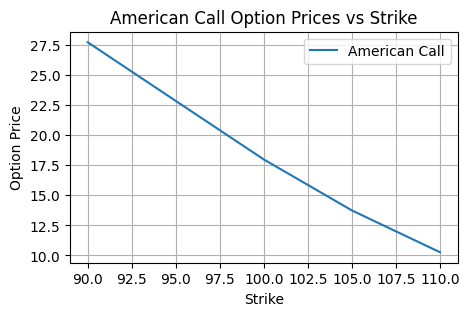

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
american_call_prices = [27.74, 22.86, 17.99, 13.75, 10.27]

Strike= [90, 95, 100, 105, 110]
plt.figure(figsize=(5, 3))


plt.plot(Strike, american_call_prices, label='American Call')


plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('American Call Option Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()

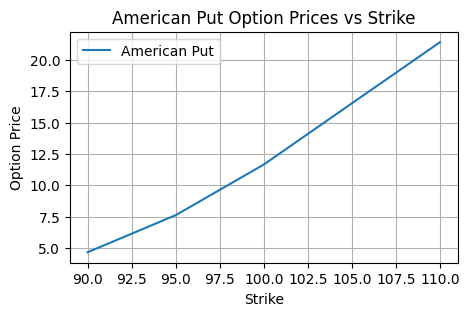

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
american_call_prices = [4.65, 7.61, 11.65, 16.54, 21.42]

Strike= [90, 95, 100, 105, 110]
plt.figure(figsize=(5, 3))


plt.plot(Strike, american_call_prices, label='American Put')


plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('American Put Option Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()

**Step 3 – Finally, you will work on hedging under Black-Scholes for European options, as well as pricing different exotic instruments.**


**7. Team member A will work with European options with same characteristics as GWP1 under different levels of moneyness:**

**a. Price an European Call option with 110% moneyness and an European Put with 95% moneyness using Black-Scholes. Both have 3 months maturity.**

The result of pricing an European Call option with 110% moneyness as well as an European Put option with 95% moneyness using the Black-Scholes model leads to a Call price of \$1.19 and a Put price of \$1.53. This suggests that the Call option is relatively cheaper than the Put option. This difference in pricing stems from the intrinsic properties of options. A Call option gives the holder the right to buy the underlying asset at a specific price, which is more valuable when the asset's price is expected to increase. Conversely, a Put option allows the holder to sell the asset at a predetermined price, thus being more valuable when the asset's price is anticipated to decrease.

This observation is further supported by the computed deltas of 0.22 for the Call option and -0.25 for the Put option. The call option's positive delta denotes a positive correlation with the movement of the underlying stock's price, whereas the put option's negative delta suggests a weak association. This observation is further supported by the computed deltas of 0.22 for the Call option and -0.25 for the Put option. The call option's positive delta denotes a positive correlation with the movement of the underlying stock's price, whereas the put option's negative delta suggests a weak association.


**b. (i) You build a portfolio that buys the previous Call and Put options. What is the delta of the portfolio?**

A major consideration for building a portfolio that buys the previous Call and Put options would be to create a combination of the two options. This is because such a portfolio could capture potential gains from both upward and downward price movements while managing risk exposure.

To calculate the delta of the portfolio that buys both the European Call option with 110% moneyness and the European Put option with 95% moneyness, you can simply sum up the deltas of the individual options in the portfolio (Portfolio Delta = Call Delta + Put Delta Portfolio Delta = 0.22 + (-0.25) = -0.03. Since the delta represents the sensitivity of the option price to changes in the underlying asset price, the portfolio delta indicates how the portfolio's value would change for a small change in the underlying asset price.

**b(ii) How would you delta-hedge this portfolio?**

We would need to take a short position in the underlying company to counteract the negative delta in order to delta-hedge this portfolio because the portfolio delta is slightly negative (-0.03). By doing this, the changes in portfolio value brought on by slight variations in stock price can be reduced. The total sensitivity of the portfolio to minute variations in stock price would be decreased, resulting in a more evenly distributed risk exposure (Marroni & Perdomo, 2014).

**c. (i) You build a second portfolio that buys the previous Call option and sells the Put. What is the delta of the portfolio?**

When you build a portfolio that buys the European Call option with 110% moneyness and simultaneously sells (writes) the European Put option with 95% moneyness, you are effectively creating a position known as a "synthetic long stock" or "covered call." In this scenario, the portfolio delta would change due to the opposing directions of the Call and Put option deltas.  In this scenario, the portfolio delta would change due to the opposing directions of the Call and Put option deltas. We calculate the new delta of the portfolio, subtract the delta of the Put option from the delta of the Call option = 0.22 - (-0.25) = 0.47.

**(c) (ii) How would you delta-hedge this portfolio?**

We would need to take a long position in the underlying company in order to align the portfolio's delta with the positive direction in order to delta-hedge this portfolio, which has a positive portfolio delta of 0.47. The portfolio can successfully counter the combined negative delta from the sold Put option and produce a positive overall delta by retaining a long position in the stock. This delta-hedging method seeks to achieve a more balanced risk exposure by controlling the portfolio's susceptibility to minute variations in stock price (Marroni & Perdomo, 2014).

In [ ]:
# @title
import numpy as np
from scipy.stats import norm

# Given parameters
S = 100  # Initial stock price
K_call = 100 * 1.10  # Strike price for European Call with 110% moneyness
K_put = 100 * 0.95   # Strike price for European Put with 95% moneyness
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 0.25  # Time to maturity (3 months in years)

# Black-Scholes formula for European option price
def european_option_price(S, K, r, sigma, T, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return option_price

# Calculate option prices
call_price = european_option_price(S, K_call, r, sigma, T, option_type='call')
put_price = european_option_price(S, K_put, r, sigma, T, option_type='put')

# Calculate Greeks
def european_option_greeks(S, K, r, sigma, T, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1) if option_type == 'call' else norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2) if option_type == 'call' else -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2) if option_type == 'call' else -K * T * np.exp(-r * T) * norm.cdf(-d2)

    return delta, gamma, vega, theta, rho

# Calculate Greeks for European Call and Put options
call_delta, call_gamma, call_vega, call_theta, call_rho = european_option_greeks(S, K_call, r, sigma, T, option_type='call')
put_delta, put_gamma, put_vega, put_theta, put_rho = european_option_greeks(S, K_put, r, sigma, T, option_type='put')

# Create a table
import pandas as pd

data = {'Option Type': ['European Call', 'European Put'],
        'Price': [call_price, put_price],
        'Delta': [call_delta, put_delta],
        'Gamma': [call_gamma, put_gamma],
        'Vega': [call_vega, put_vega],
        'Theta': [call_theta, put_theta],
        'Rho': [call_rho, put_rho]}

df = pd.DataFrame(data)

print(df)


     Option Type     Price     Delta     Gamma       Vega     Theta       Rho
0  European Call  1.191132  0.218255  0.029474  14.737028 -6.926527  5.158580
1   European Put  1.534260 -0.245748  0.031488  15.743988 -4.992145 -6.527253


In [ ]:
# @title
from tabulate import tabulate

# Prepare your data as a list of lists
table_data = [
    ["7", "Call", "European", "BS", "110%", "1.19", "0.22"],
    ["7", "Put", "European", "BS", "95%", "1.53", "-0.25"],
]

# Define the title for the table
table_title = "Summary of Results"

# Define the table headers
headers = ["Q #", "Type", "Exer", "GWP 2 Method", "Moneyness", "GWP 2 Price", "Delta"]

# Format the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Add the title above the table
table_with_title = f"{table_title}\n\n{table}"

# Print the formatted table
print(table_with_title)


Summary of Results

+-------+--------+----------+----------------+-------------+---------------+---------+
|   Q # | Type   | Exer     | GWP 2 Method   | Moneyness   |   GWP 2 Price |   Delta |
+=======+========+==========+================+=============+===============+=========+
|     7 | Call   | European | BS             | 110%        |          1.19 |    0.22 |
+-------+--------+----------+----------------+-------------+---------------+---------+
|     7 | Put    | European | BS             | 95%         |          1.53 |   -0.25 |
+-------+--------+----------+----------------+-------------+---------------+---------+


In [ ]:
# @title
# Given deltas of the Call and Put options
call_delta = 0.22
put_delta = -0.25

# Calculate the delta of the portfolio
portfolio_delta = call_delta + put_delta

print("Delta of the Portfolio:", portfolio_delta)


Delta of the Portfolio: -0.03


In [ ]:
# @title
# Given deltas of the Call and Put options
call_delta = 0.22
put_delta = -0.25

# Calculate the new delta of the portfolio
new_portfolio_delta = call_delta - put_delta

print("New Delta of the Portfolio:", new_portfolio_delta)


New Delta of the Portfolio: 0.47


**8. Team member B will work with Monte-Carlo methods with daily time steps to price an Up-and-Out (UAO) barrier option. The option is currently ATM with a barrier level of 141 and:**

(S0) = $100, Risk-free rate (r) = 5%, Volatility (σ) = 20%, Time horizon (T) = 8 months (in years=8/12),:





In [ ]:
# @title
import numpy as np
from scipy.stats import norm

# Given parameters
S0 = 120  # Initial stock price
r = 0.06  # Risk-free rate
sigma = 0.30  # Volatility
T = 8 / 12  # Time horizon in years (8 months)
N = 240  # Number of trading days in 8 months
M = 100000  # Number of simulations
barrier_level = 141  # Barrier level

# Generate random price movements
np.random.seed(42)
rand_numbers = np.random.normal(size=(M, N))

# Calculate daily returns
daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

# Create stock price paths
stock_paths = np.zeros((M, N + 1))
stock_paths[:, 0] = S0
for i in range(1, N + 1):
    stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

# Calculate option payoffs at each time step
uao_payoffs = np.maximum(stock_paths[:, -1] - S0, 0)  # Vanilla option payoff
uao_payoffs = np.where(np.max(stock_paths[:, 1:], axis=1) <= barrier_level, uao_payoffs, 0)  # Apply barrier condition

# Calculate option price using Monte Carlo simulation
option_price = np.exp(-r * T) * uao_payoffs.mean()

print("Monte Carlo UAO Barrier Option Price:", option_price)


Monte Carlo UAO Barrier Option Price: 0.43700624471549165


**9. Team member C will repeat the previous question (barrier option), in this case considering an Up-and-In barrier (UAI) option with the same barrier as before. Specifically:**

**a. Compute the price of the UAI option.**




In [ ]:
# @title
import numpy as np
from scipy.stats import norm

# Given parameters (same as before)
S0 = 120
r = 0.06
sigma = 0.30
T = 8 / 12
N = 240
M = 100000
barrier_level = 141

# Generate random price movements
np.random.seed(42)
rand_numbers = np.random.normal(size=(M, N))

# Calculate daily returns
daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

# Create stock price paths
stock_paths = np.zeros((M, N + 1))
stock_paths[:, 0] = S0
for i in range(1, N + 1):
    stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

# Calculate option payoffs at each time step for UAI
uai_payoffs = np.maximum(stock_paths[:, -1] - S0, 0)  # Vanilla option payoff
uai_payoffs = np.where(np.max(stock_paths[:, 1:], axis=1) >= barrier_level, uai_payoffs, 0)  # Apply barrier condition

# Calculate UAI option price using Monte Carlo simulation
uai_option_price = np.exp(-r * T) * uai_payoffs.mean()

print("Monte Carlo UAI Barrier Option Price:", uai_option_price)


Monte Carlo UAI Barrier Option Price: 17.42817164056827


**b. Compute the price of the vanilla option (same characteristics, no barrier)**


In [ ]:
# @title
import numpy as np
from scipy.stats import norm

# Given parameters (same as before)
S0 = 120
r = 0.06
sigma = 0.30
T = 8 / 12
N = 240
M = 100000

# Generate random price movements
np.random.seed(42)
rand_numbers = np.random.normal(size=(M, N))

# Calculate daily returns
daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

# Create stock price paths
stock_paths = np.zeros((M, N + 1))
stock_paths[:, 0] = S0
for i in range(1, N + 1):
    stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

# Calculate option payoffs at each time step for vanilla option
vanilla_payoffs = np.maximum(stock_paths[:, -1] - S0, 0)

# Calculate vanilla option price using Monte Carlo simulation
vanilla_option_price = np.exp(-r * T) * vanilla_payoffs.mean()

print("Monte Carlo Vanilla Option Price:", vanilla_option_price)


Monte Carlo Vanilla Option Price: 17.865177885283757


In [ ]:
# @title
from tabulate import tabulate

# Prepare your data as a list of lists
table_data = [
    ["9", "UAI", "MC", "17.42"],
    ["9", "UAO", "MC", "0.44"],
    ["9", "Vanilla","MC", "17.87"]
]

# Define the title for the table
table_title = "Summary of Results"

# Define the table headers
headers = ["Q #", "Type", "GWP 2 Method", "Price"]

# Format the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Add the title above the table
table_with_title = f"{table_title}\n\n{table}"

# Print the formatted table
print(table_with_title)


Summary of Results

+-------+---------+----------------+---------+
|   Q # | Type    | GWP 2 Method   |   Price |
+=======+=========+================+=========+
|     9 | UAI     | MC             |   17.42 |
+-------+---------+----------------+---------+
|     9 | UAO     | MC             |    0.44 |
+-------+---------+----------------+---------+
|     9 | Vanilla | MC             |   17.87 |
+-------+---------+----------------+---------+



**c. What is the relationship between the prices of the UAO, UAI, and vanilla option? Explain.**

Vanilla options have the highest price because they lack barrier conditions and offer more flexibility to the option holder.
UAI options have an intermediate price, as they introduce the possibility of barrier activation, which can increase the option's value.
UAO options have the lowest price due to the barrier condition, which reduces the likelihood of exercise and makes them less valuable than vanilla options.

###REFERENCES
Schumacher, J. M. (2020). *Introduction to Financial Derivatives: Modeling, Pricing and Hedging.* Open Press TiU: https://digi-courses.com/openpresstiu-introduction-to-financial-derivatives/


FinCampus Lecture Hall. Pricing an American Option: 3 Period Binomial Tree Model. *YouTube,* 26 May 2013, https://www.youtube.com/watch?v=35n7TICJbLc.

Marroni L. & I. Perdomo (2014). *Pricing and Hedging Financial Derivatives: A Guide for Practitioners.* Wiley